<a href="https://colab.research.google.com/github/alik604/CMPT-419/blob/master/ML_algo_for_baseline_%26_candle_stick_ploting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FNGU https://www.bmoetns.com/Documents/FNGU/Fact_Sheet.pdf

### decent tutorial: https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/

example at end of: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/


example: https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/


In [0]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
!pip install pandas-datareader
from pandas_datareader import data as pdr
!pip install fix-yahoo-finance
import fix_yahoo_finance as yf


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas_datareader.data as web
import datetime
 
  
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

plt.style.use('fivethirtyeight')  
  
  
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


Populating the interactive namespace from numpy and matplotlib


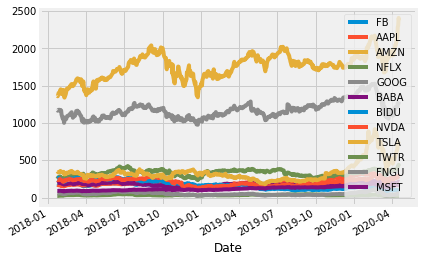

In [0]:
AAPL = web.DataReader("AAPL", "yahoo", start, end)
NFLX = web.DataReader("NFLX", "yahoo", start, end)
GOOG = web.DataReader("GOOG", "yahoo", start, end)
FB = web.DataReader("FB", "yahoo", start, end)
AMZN = web.DataReader("AMZN", "yahoo", start, end)
BABA = web.DataReader("BABA", "yahoo", start, end)
BIDU = web.DataReader("BIDU", "yahoo", start, end)
NVDA = web.DataReader("NVDA", "yahoo", start, end)
TSLA = web.DataReader("TSLA", "yahoo", start, end)
TWTR = web.DataReader("TWTR", "yahoo", start, end)

FNGU = web.DataReader("FNGU", "yahoo", start, end)

MSFT = web.DataReader("MSFT", "yahoo", start, end)

stocks = pd.DataFrame({
                      "FB"  : FB["Adj Close"],
                      "AAPL": AAPL["Adj Close"],
                      "AMZN": AMZN["Adj Close"],
                      "NFLX": NFLX["Adj Close"],
                      "GOOG": GOOG["Adj Close"],
                      "BABA": BABA["Adj Close"],
                      "BIDU": BIDU["Adj Close"],
                      "NVDA": NVDA["Adj Close"],
                      "TSLA": TSLA["Adj Close"],
                      "TWTR": TWTR["Adj Close"],
   
                      "FNGU": FNGU["Adj Close"],
    
                      "MSFT": MSFT["Adj Close"]
})
stocks=stocks.dropna()
stocks.plot(grid = True)

### FNGU https://www.bmoetns.com/Documents/FNGU/Fact_Sheet.pdf

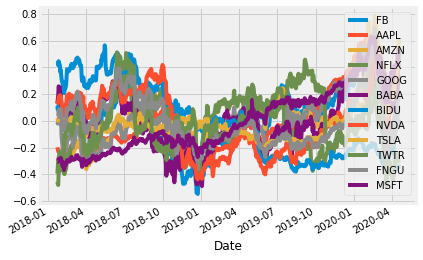

In [0]:
def normIt(myDf):
   return (myDf - myDf.mean()) / (myDf.max() - myDf.min())

# df_apple_norm = normIt(AAPL)
# df_google_norm = normIt(google)
# df_nflx_norm = normIt(NFLX)
# df_FB_norm = normIt(FB)
# df_AMZN_norm = normIt(AMZN)
# df_BABA_norm = normIt(BABA)
# df_BIDU_norm = normIt(BIDU)
# df_NVDA_norm = normIt(NVDA)
# df_TSLA_norm = normIt(TSLA)
# df_TWTR_norm = normIt(TWTR)

# df_microsoft_norm = normIt(microsoft)
stocks_norm = normIt(stocks)
stocks_norm= stocks_norm.dropna()
stocks_norm.plot()

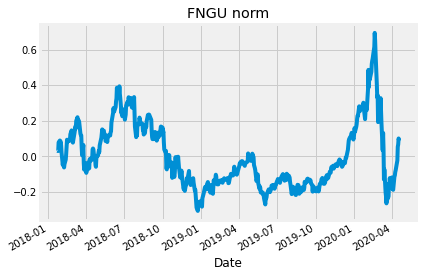

In [0]:
stocks_norm.FNGU.plot(grid = True,title = "FNGU norm")

In [0]:
stocks_norm.head()

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
Date,,,,,,,,,,,,
2018-01-23,0.110566,-0.197970,-0.371573,-0.395631,-0.010303,0.128959,0.432354,0.149967,0.021611,-0.457222,0.031567,-0.305908
2018-01-24,0.082332,-0.212538,-0.376280,-0.341999,-0.020712,0.161498,0.435397,0.133544,0.012268,-0.472569,0.030365,-0.306637
2018-01-25,0.091709,-0.228604,-0.357152,-0.301081,-0.009576,0.189532,0.416340,0.136448,0.001095,-0.481051,0.029928,-0.301992
2018-01-26,0.117120,-0.226538,-0.334599,-0.277213,0.000361,0.258515,0.446822,0.173306,0.008151,-0.395833,0.078129,-0.286235
2018-01-29,0.076584,-0.244877,-0.319972,-0.228550,-0.000111,0.236388,0.414295,0.191894,0.017197,-0.359080,0.088950,-0.287510


In [0]:
corrwith = stocks_norm.corr()
corrwith

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
FB,1.000000,0.553190,0.421842,0.308143,0.712854,0.746509,-0.142025,0.344181,0.244185,0.442081,0.538124,0.514803
AAPL,0.553190,1.000000,0.658370,0.190966,0.869940,0.575773,-0.518030,0.442373,0.675716,-0.046457,0.399938,0.888898
AMZN,0.421842,0.658370,1.000000,0.604740,0.616910,0.263954,-0.466863,0.236122,0.356858,0.214931,0.258462,0.723525
NFLX,0.308143,0.190966,0.604740,1.000000,0.235844,0.336503,0.112615,0.323270,0.254167,0.192360,0.462236,0.185011
GOOG,0.712854,0.869940,0.616910,0.235844,1.000000,0.670533,-0.381304,0.380370,0.585827,0.140409,0.518027,0.788249
BABA,0.746509,0.575773,0.263954,0.336503,0.670533,1.000000,0.050969,0.593522,0.573773,0.076796,0.683470,0.437578
BIDU,-0.142025,-0.518030,-0.466863,0.112615,-0.381304,0.050969,1.000000,0.443291,-0.147081,-0.045551,0.490289,-0.802215
NVDA,0.344181,0.442373,0.236122,0.323270,0.380370,0.593522,0.443291,1.000000,0.525870,-0.159166,0.823456,0.080036
TSLA,0.244185,0.675716,0.356858,0.254167,0.585827,0.573773,-0.147081,0.525870,1.000000,-0.210930,0.584431,0.557777
TWTR,0.442081,-0.046457,0.214931,0.192360,0.140409,0.076796,-0.045551,-0.159166,-0.210930,1.000000,0.169923,0.079819


In [0]:
corr_cumSum= corrwith.cumsum()
corr_cumSum

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
FB,1.000000,0.553190,0.421842,0.308143,0.712854,0.746509,-0.142025,0.344181,0.244185,0.442081,0.538124,0.514803
AAPL,1.553190,1.553190,1.080212,0.499109,1.582794,1.322283,-0.660055,0.786555,0.919901,0.395624,0.938063,1.403702
AMZN,1.975032,2.211560,2.080212,1.103849,2.199704,1.586237,-1.126918,1.022676,1.276759,0.610555,1.196524,2.127226
NFLX,2.283175,2.402526,2.684952,2.103849,2.435547,1.922740,-1.014302,1.345946,1.530926,0.802915,1.658761,2.312238
GOOG,2.996028,3.272467,3.301862,2.339693,3.435547,2.593273,-1.395606,1.726316,2.116753,0.943324,2.176788,3.100486
BABA,3.742538,3.848240,3.565816,2.676196,4.106081,3.593273,-1.344637,2.319838,2.690526,1.020120,2.860258,3.538064
BIDU,3.600513,3.330210,3.098953,2.788811,3.724776,3.644242,-0.344637,2.763129,2.543445,0.974570,3.350546,2.735850
NVDA,3.944695,3.772583,3.335074,3.112081,4.105146,4.237764,0.098654,3.763129,3.069315,0.815404,4.174003,2.815886
TSLA,4.188880,4.448299,3.691932,3.366248,4.690974,4.811537,-0.048427,4.288999,4.069315,0.604474,4.758434,3.373663
TWTR,4.630961,4.401842,3.906863,3.558608,4.831383,4.888334,-0.093978,4.129833,3.858385,1.604474,4.928357,3.453482


In [0]:
keepThese = corr_cumSum.loc[:, corr_cumSum.iloc[-1] > corr_cumSum.iloc[-1].mean()*1.1]
keepThese

,FB,AAPL,GOOG,BABA,NVDA,FNGU
FB,1.000000,0.553190,0.712854,0.746509,0.344181,0.538124
AAPL,1.553190,1.553190,1.582794,1.322283,0.786555,0.938063
AMZN,1.975032,2.211560,2.199704,1.586237,1.022676,1.196524
NFLX,2.283175,2.402526,2.435547,1.922740,1.345946,1.658761
GOOG,2.996028,3.272467,3.435547,2.593273,1.726316,2.176788
BABA,3.742538,3.848240,4.106081,3.593273,2.319838,2.860258
BIDU,3.600513,3.330210,3.724776,3.644242,2.763129,3.350546
NVDA,3.944695,3.772583,4.105146,4.237764,3.763129,4.174003
TSLA,4.188880,4.448299,4.690974,4.811537,4.288999,4.758434
TWTR,4.630961,4.401842,4.831383,4.888334,4.129833,4.928357


In [0]:
dropAllButThese = keepThese.columns.to_list()
dropAllButThese.append("FNGU")
dropAllButThese=list(set(dropAllButThese))

In [0]:
corrwith[dropAllButThese]#.cumsum()

,FNGU,AAPL,NVDA,GOOG,BABA,FB
FB,0.538124,0.553190,0.344181,0.712854,0.746509,1.000000
AAPL,0.399938,1.000000,0.442373,0.869940,0.575773,0.553190
AMZN,0.258462,0.658370,0.236122,0.616910,0.263954,0.421842
NFLX,0.462236,0.190966,0.323270,0.235844,0.336503,0.308143
GOOG,0.518027,0.869940,0.380370,1.000000,0.670533,0.712854
BABA,0.683470,0.575773,0.593522,0.670533,1.000000,0.746509
BIDU,0.490289,-0.518030,0.443291,-0.381304,0.050969,-0.142025
NVDA,0.823456,0.442373,1.000000,0.380370,0.593522,0.344181
TSLA,0.584431,0.675716,0.525870,0.585827,0.573773,0.244185
TWTR,0.169923,-0.046457,-0.159166,0.140409,0.076796,0.442081


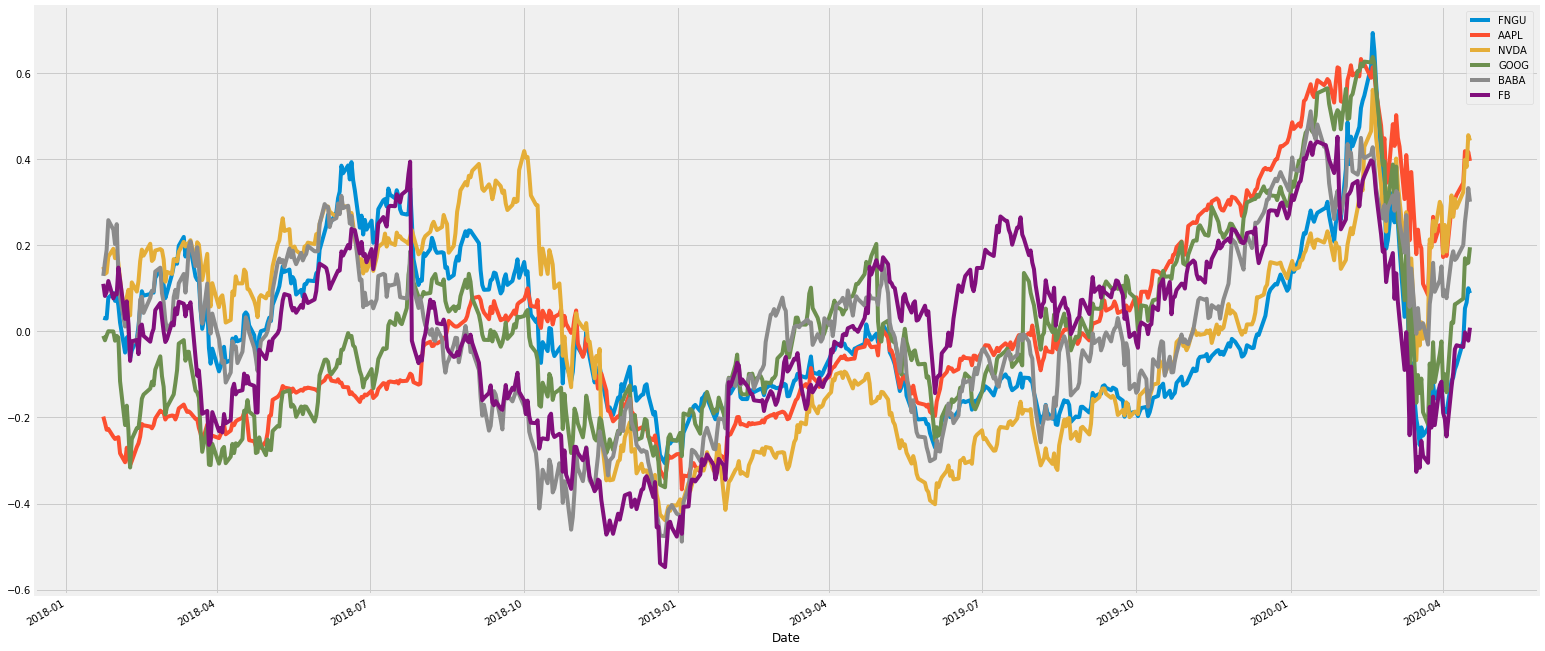

In [0]:
stocks_main = stocks[dropAllButThese]
stocks_main_norm= normIt(stocks_main)
stocks_main_norm.plot(figsize=(24,12))

In [0]:
stocks_main_norm.columns

Index(['FNGU', 'AAPL', 'NVDA', 'GOOG', 'BABA', 'FB'], dtype='object')

# LSTM

In [0]:
y = stocks_main_norm.FNGU.values
x = stocks_main_norm.drop(['FNGU'],axis=1,inplace=False)

# howManyPoint = 400
# y = y[-howManyPoint:]
# x = x[-howManyPoint:]

x = x.values

maxlen = 60
from keras.preprocessing import sequence
# x_train = sequence.pad_sequences(x, maxlen=maxlen)
# x_test = sequence.pad_sequences(x, maxlen=maxlen)

# Split data into x_train and y_train
x_train = []
y_train = []

for i in range(maxlen, len(x)):
  x_train.append(x[i-maxlen: i, :])
  # FGNU is last column in set
  y_train.append(y[i])
  
x_train, y_train = np.array(x_train), np.array(y_train)


Using TensorFlow backend.


In [0]:
print('before reshaping: ',x_train.shape )

before reshaping:  (503, 60, 5)


In [0]:
print('x_train shape:', x_train.shape)
# print('x_test shape:', x_test.shape)
# print(x.shape)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x.shape[1]))   # 549 , 60 , 4
print('after reshaping: ',x_train.shape )

x_train shape: (503, 60, 5)
after reshaping:  (503, 60, 5)


In [0]:
# !pip install --upgrade tensorflow
# !pip install --upgrade keras

np.random.seed(42)
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Activation, Dropout,Embedding
from tensorflow.keras.layers import ELU, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.compat.v1.keras.layers import CuDNNGRU, CuDNNLSTM


# The LSTM model
#// shape     https://datascience.stackexchange.com/a/33429/90979

# [data samples, time steps, features]

my_model = Sequential()
# my_model.add(LSTM(input_shape = (x_train.shape[1], x_train.shape[2]),units=75, return_sequences=True))
# my_model.add(LSTM(units=50, return_sequences=False))
my_model.add(LSTM(input_shape = (x_train.shape[1], x_train.shape[2]),units=500, return_sequences=True)) #  dropout=0.2, recurrent_dropout=0.2
my_model.add(LSTM(units=200, return_sequences=False))
my_model.add(Dense(units=25))
my_model.add(Dense(units=1))

my_model.compile(loss='mse', optimizer='rmsprop')
# my_model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
history = my_model.fit(x_train, y_train, batch_size=16, epochs=30, validation_split=0.05, verbose=1,workers=-1)

# Predict the test set
# yhat = my_model.predict(x_train)

Epoch 1/30
30/30 [==============================] - 1s 41ms/step - loss: 0.0351 - val_loss: 0.0785
Epoch 2/30
30/30 [==============================] - 0s 13ms/step - loss: 0.0097 - val_loss: 0.0403
Epoch 3/30
30/30 [==============================] - 0s 12ms/step - loss: 0.0086 - val_loss: 0.0518
Epoch 4/30
30/30 [==============================] - 0s 13ms/step - loss: 0.0077 - val_loss: 0.3063
Epoch 5/30
30/30 [==============================] - 0s 13ms/step - loss: 0.0103 - val_loss: 0.0350
Epoch 6/30
30/30 [==============================] - 0s 13ms/step - loss: 0.0065 - val_loss: 0.0707
Epoch 7/30
30/30 [==============================] - 0s 13ms/step - loss: 0.0086 - val_loss: 0.0362
Epoch 8/30
30/30 [==============================] - 0s 13ms/step - loss: 0.0045 - val_loss: 0.0217
Epoch 9/30
30/30 [==============================] - 0s 13ms/step - loss: 0.0042 - val_loss: 0.0251
Epoch 10/30
30/30 [==============================] - 0s 13ms/step - loss: 0.0054 - val_loss: 0.0445
Epoch 11/


MSE:  0.0034974968018318736


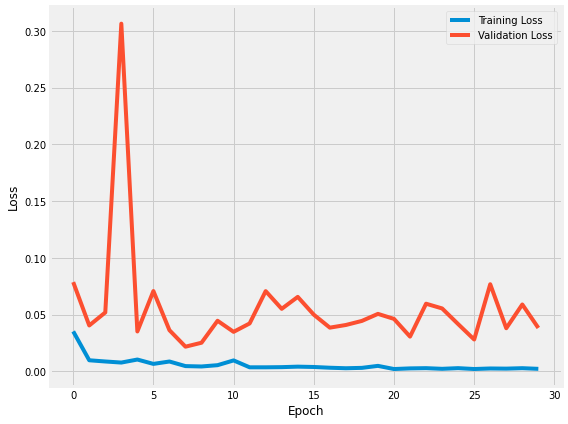

In [0]:
def plot_loss_history(history):  
    fig, ax = plt.subplots(figsize=(8, 8 * 3 / 4))
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend(loc='upper right')
    fig.tight_layout()
plot_loss_history(history)

# Predict the test set
yhat = my_model.predict(x_train)
MSE = mean_squared_error(yhat,y_train)
print('\nMSE: ',MSE)

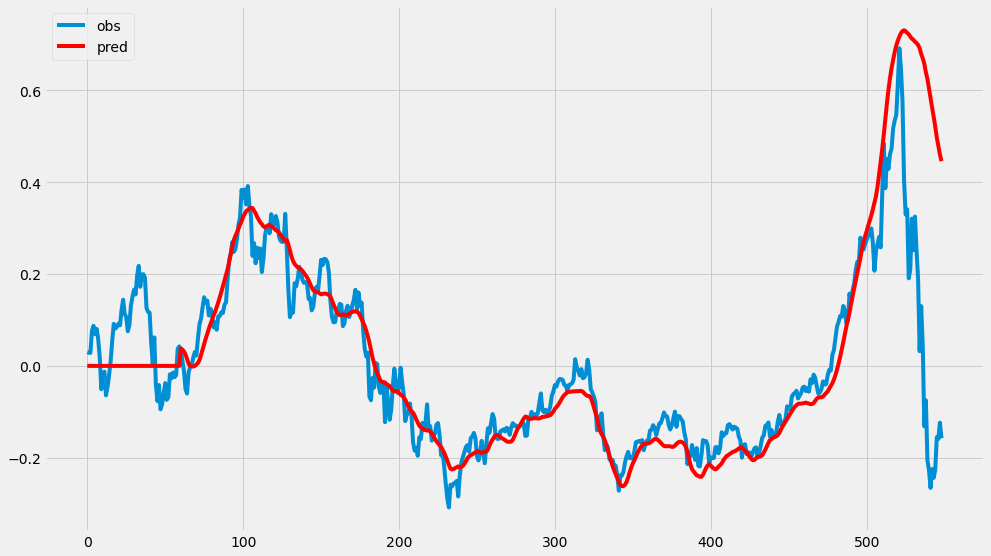

In [0]:
tmp = [0] * 60
for i in yhat:
  tmp.append(float(i))

plt.plot(y,label ='obs');
plt.plot(tmp,c='r',label = "pred",);
plt.legend();
plt.show()

In [0]:
# from keras.utils import plot_model
# plot_model(my_model, to_file='model.png')

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

KeyError: ignored

In [0]:
x_train.shape

In [0]:
tf.config.list_physical_devices()

# Prediction

## ARIMA to forecast 



In [0]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
  

# model = ARIMA(stocks_main_norm["FNGU"], order=(5,1,0))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())
# # plot residual errors
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()

# residuals.plot(kind='kde')
# pyplot.show()
# print(residuals.describe())




In [0]:
X = stocks_main_norm["FNGU"].values
size = int(len(X) - 11)
train, test = X[math.ceil(size/2):size], X[size:]   # decrease the traning set 
predictions = train.tolist() #[x for x in train]
only_pred = list()
for t in range(len(test)):
	model = ARIMA(predictions, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0][0]
	predictions.append(yhat)
	only_pred.append(yhat)
	print('predicted=%f, expected=%f' % (yhat, test[t]))

# plot
error = mean_squared_error(test, predictions[:len(test)])
print('Test MSE: %.5f' % error)

pyplot.plot(np.concatenate([train,test]))
pyplot.plot(predictions, color='red')
pyplot.show()

In [0]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = stocks_main_norm["FNGU"].values
size = int(len(X) - 11)
train, test = X[math.ceil(size/2):size], X[size:]   # decrease the traning set 
predictions = train.tolist() #[x for x in train]
only_pred = list()
for t in range(len(test)):
	model = ARIMA(predictions, order=(5,1,2))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0][0]
	predictions.append(yhat)
	only_pred.append(yhat)
	print('predicted=%f, expected=%f' % (yhat, test[t]))

# plot
error = mean_squared_error(test, predictions[:len(test)])
print('Test MSE: %.5f' % error)

pyplot.plot(np.concatenate([train,test]))
pyplot.plot(predictions, color='red')
pyplot.show()

In [0]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = stocks_main_norm["FNGU"].values
size = int(len(X) - 11)
train, test = X[400:size], X[size:]   # decrease the traning set 
predictions = train.tolist() #[x for x in train]
only_pred = list()
for t in range(len(test)):
	model = ARIMA(predictions, order=(5,1,2))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0][0]
	predictions.append(yhat)
	only_pred.append(yhat)
	print('predicted=%f, expected=%f' % (yhat, test[t]))

# plot
error = mean_squared_error(test, predictions[:len(test)])
print('Test MSE: %.5f' % error)

pyplot.plot(np.concatenate([train,test]))
pyplot.plot(predictions, color='red',label = "pred" )
pyplot.show()

## Vector Autoregression (VAR) to forecast 


https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [0]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [0]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df.shape)  # (123, 8)
df.tail()

In [0]:
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [0]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

In [0]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

In [0]:
nobs = 4
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

In [0]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    # print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    # print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    # print(f' Significance Level    = {signif}')
    # print(f' Test Statistic        = {output["test_statistic"]}')
    # print(f' No. Lags Chosen       = {output["n_lags"]}')

    # for key,val in r[4].items():
    #     print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        # print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        # print(f" => Series is Stationary.")
        return True
    else:
        print(f"Augmented Dickey-Fuller Test on {name}; P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        # print(f" => Series is Non-Stationary.")   
        return False 

In [0]:
# ADF Test on each column
loops = 0
df_differenced = df_train.diff().dropna()
def repeater(df_differenced):
  global loops
  for name, column in df_differenced.iteritems():
      isDone = adfuller_test(column, name=column.name)
      if isDone == False:
        loops += 1
        repeater(df_differenced.diff().dropna())


repeater(df_differenced)

In [0]:
loops

In [0]:
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

In [0]:
x = model.select_order(maxlags=12)
x.summary()

In [0]:
model_fitted = model.fit(4)
model_fitted.summary()

In [0]:
# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
from statsmodels.stats.stattools import durbin_watson 
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

In [0]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

In [0]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

In [0]:
# def invert_transformation(df_train, df_forecast, cols, second_diff):
#     """Revert back the differencing to get the forecast to original scale."""
#     df_fc = df_forecast.copy()
#     for col in cols:        
#         # Roll back 2nd Diff
#         if second_diff:
#             df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
#         # Roll back 1st Diff
#         df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
#     return df_fc

In [0]:
# df_results = invert_transformation(train, df_forecast, df_train.columns,second_diff=True)        
# df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
#                    'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

In [0]:
# // stuck on 14. Invert the transformation to get the real forecast

# https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

## SVM & RandomForestRegressor & bayesian regression fitting

In [0]:
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor

In [0]:
howManyPoint = 150

y = stocks_main_norm.FNGU.values
x = stocks_main_norm.drop(['FNGU'],axis=1,inplace=False)
y = y[-howManyPoint:]
x = x[-howManyPoint:]
reg = SVR(kernel='rbf')
reg = RandomForestRegressor(n_jobs=-1,n_estimators=999,random_state=42,criterion='mse')
reg.fit(x,y)

yhat = reg.predict(x)
MSE = mean_squared_error(yhat,y)
print('\nMSE: ',MSE)

In [0]:
# plt.title("RandomForestRegressor")
# plt.plot(y,label ='obs');
# plt.plot(yhat,c='r',label = "pred");
# plt.legend();
# plt.show()

In [0]:
reg = SVR(kernel='rbf')
reg.fit(x,y)

yhat = reg.predict(x)
MSE = mean_squared_error(yhat,y)
print('\nMSE: ',MSE)

In [0]:
# plt.plot(y,label ='obs');
# plt.plot(yhat,c='r',label = "pred");
# plt.legend();
# plt.show()

# candle stick ploting 

In [0]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip


In [0]:
 from matplotlib.dates import DateFormatter, WeekdayLocator,    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
 
    plt.show()
 
#pandas_candlestick_ohlc(apple)
FNGU = web.DataReader("FNGU", "yahoo", start, end)

FNGU["14d"] = np.round(FNGU["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(FNGU.loc['2019-01-04':], otherseries = "14d") # FNGU.loc['201-01-04':'2016-08-07',:]

In [0]:
from sklearn.linear_model import ARDRegression # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge

reg = ARDRegression(n_iter=600,tol = 1e-99,compute_score=True)
reg.fit(x,y)

yhat = reg.predict(x)
MSE = mean_squared_error(yhat,y)
print('\nMSE - ARDRegression: ',MSE)

from sklearn.linear_model import BayesianRidge
reg = BayesianRidge(n_iter=600,tol = 1e-99,compute_score=True)
reg.fit(x,y)

yhat = reg.predict(x)
MSE = mean_squared_error(yhat,y)
print('\nMSE - BayesianRidge : ',MSE)